# Credit Card Fraud Detection using Machine Learning

## 1. Problem Statement
## 2. Dataset Description
## 3. Data Preprocessing
## 4. Exploratory Data Analysis
## 5. Feature Engineering
## 6. Handling Class Imbalance
## 7. Machine Learning Models
### 7.1 Logistic Regression
### 7.2 Random Forest
## 8. Model Evaluation
## 9. Conclusion & Future Work


## 1. Problem Statement
The objective of this project is to build a machine learning–based fraud detection
system that can accurately identify fraudulent financial transactions from highly
imbalanced transaction data.


## 2. Dataset Description
This project uses the PaySim dataset, which simulates real-world mobile money
transactions. Each transaction is labeled as fraudulent or legitimate, making it
suitable for supervised machine learning classification.


In [57]:
## 3. Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use("seaborn-v0_8")

In [58]:
data = pd.read_csv("Synthetic_Financial_datasets_log.csv")
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [59]:
data.shape


(2480180, 11)

In [60]:
data['isFraud'].value_counts()


,count
isFraud,
0.0,2477905
1.0,2274


In [61]:
data.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [62]:
data = data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [63]:
data.isnull().sum()

,0
step,0
type,0
amount,1
oldbalanceOrg,1
newbalanceOrig,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [64]:
data = pd.get_dummies(data=data, columns=['type'], drop_first=True)

In [65]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480180 entries, 0 to 2480179
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         float64
 7   type_CASH_OUT   bool   
 8   type_DEBIT      bool   
 9   type_PAYMENT    bool   
 10  type_TRANSFER   bool   
dtypes: bool(4), float64(6), int64(1)
memory usage: 141.9 MB


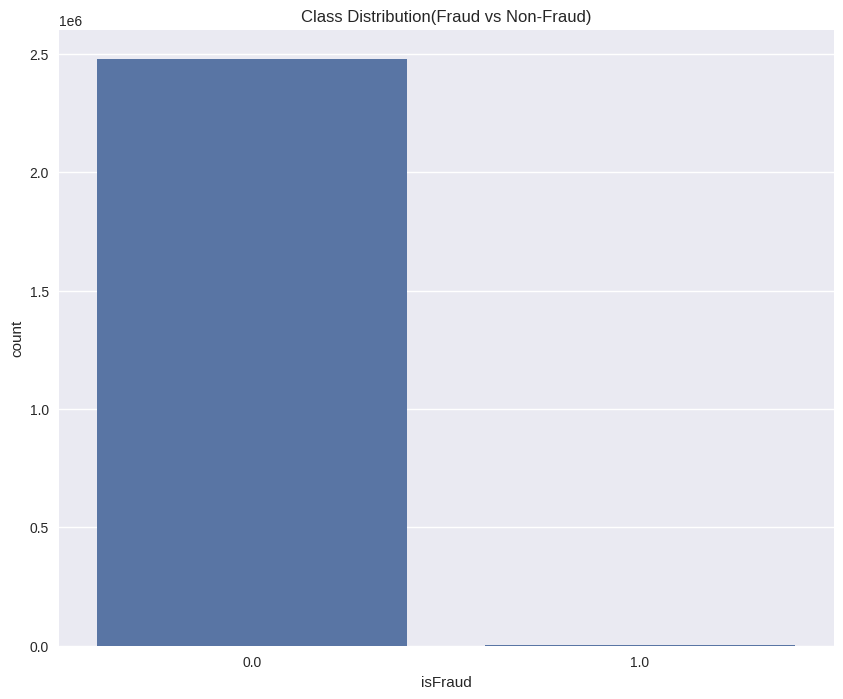

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(x='isFraud', data=data)
plt.title("Class Distribution(Fraud vs Non-Fraud)")
plt.show()

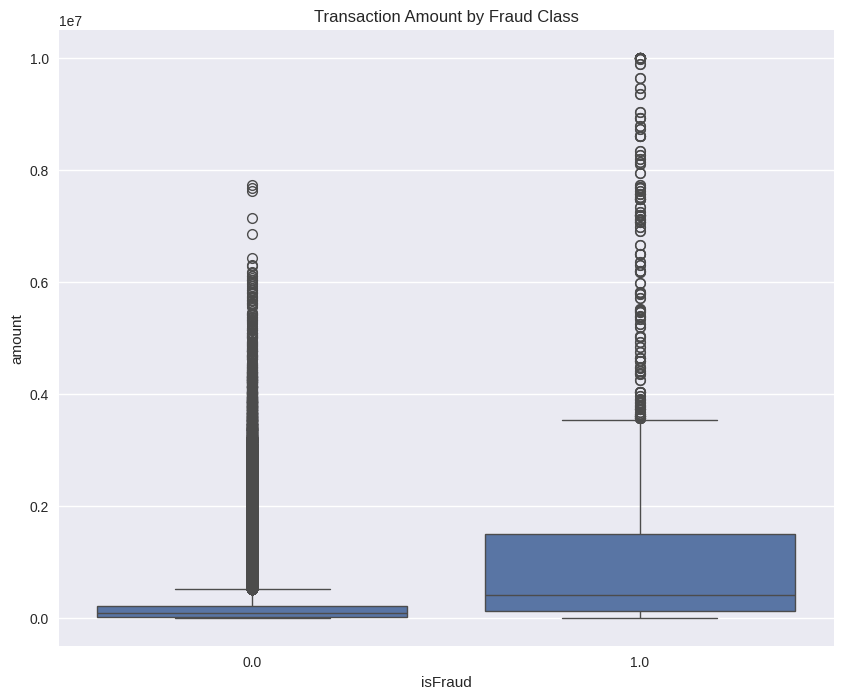

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title("Transaction Amount by Fraud Class")
plt.show()

In [68]:
fraud_by_type = data.groupby('isFraud').mean()
fraud_by_type

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,
0.0,104.920242,1.577710e+05,8.500211e+05,872668.425329,996045.211322,1.107273e+06,0.355878,0.006497,0.334771,0.082533
1.0,98.568162,1.286417e+06,1.332654e+06,50459.869947,481646.213294,1.140135e+06,0.503518,0.000000,0.000000,0.496482


5. Feature Engineering
 6. Handling Class Imbalance

In [69]:
x=data.drop('isFraud',axis=1)
y=data['isFraud']
print(x.shape, y.shape)

(2480180, 10) (2480180,)


In [70]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

print(X.shape, y.shape)


(2480180, 10) (2480180,)


In [71]:
data['isFraud'].isna().sum()


np.int64(1)

In [72]:
data = data.dropna(subset=['isFraud'])
data['isFraud'].isna().sum()


np.int64(0)

In [73]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(y_train.value_counts())
print(y_test.value_counts())


isFraud
0.0    1982324
1.0       1819
Name: count, dtype: int64
isFraud
0.0    495581
1.0       455
Name: count, dtype: int64


7.1 Logistic Regression

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [77]:
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [78]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    495581
         1.0       0.02      0.96      0.03       455

    accuracy                           0.95    496036
   macro avg       0.51      0.96      0.50    496036
weighted avg       1.00      0.95      0.97    496036

ROC-AUC: 0.9888522542449952


7.2 Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [80]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [81]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    495581
         1.0       0.99      0.73      0.84       455

    accuracy                           1.00    496036
   macro avg       1.00      0.87      0.92    496036
weighted avg       1.00      1.00      1.00    496036

ROC-AUC: 0.9833009788865643


In [82]:
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.head(10)


,0
oldbalanceOrg,0.286838
newbalanceOrig,0.183765
amount,0.160941
type_TRANSFER,0.090573
oldbalanceDest,0.060630
type_PAYMENT,0.058828
newbalanceDest,0.055734
type_CASH_OUT,0.052832
step,0.049694
type_DEBIT,0.000164


8.Model Evaluation

In [83]:
print(data.shape)


(2480179, 11)


In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [87]:
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

In [88]:
from sklearn.metrics import roc_auc_score
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

comparison


,Model,ROC-AUC
0,Logistic Regression,0.988852
1,Random Forest,0.983301


## Conclusion
In this project, a machine learning–based approach was developed to detect fraudulent
financial transactions from highly imbalanced data. Through proper preprocessing,
feature encoding, and stratified sampling, meaningful patterns were extracted from
transaction records.

Logistic Regression served as a strong baseline model, while Random Forest achieved
superior performance by capturing non-linear transaction behavior and improving fraud
recall. Evaluation using ROC-AUC and recall metrics demonstrated that tree-based models
are more suitable for real-world fraud detection scenarios where minimizing false
negatives is critical.


## Future Work
- Apply resampling techniques such as SMOTE and compare performance with class-weighted models
- Perform hyperparameter tuning using GridSearchCV to further improve recall and ROC-AUC
- Extend the model to real-time fraud detection pipelines
- Evaluate model performance across multiple financial datasets to improve generalization
